In [1]:
## This is Project 1 for LAGCC Python 
## Purpose: to analyze student test performance 
## Paramaters:
## - any school in the dataset as initial comparison point
## - pick a feature/measure/score/metric
## - compare choice schhool to other schools - choose subset or don't

## Final project should include descriptive statistics, cleaning tasks, visualizations, brief conclusion statement.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
df.head() ## To get a quick glimpse into the dataset

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [4]:
for col in df.columns:
    print(col)
## this is to see if there are other column names I didn't see above. 
## Note: what is CR?

## If I use for loop and print function, it prints the stuff vertically which is better on the eyes.

School DBN
School Name
School Level
Regents Exam
Year
Total Tested
Mean Score
Number Scoring Below 65
Percent Scoring Below 65
Number Scoring 65 or Above
Percent Scoring 65 or Above
Number Scoring 80 or Above
Percent Scoring 80 or Above
Number Scoring CR
Percent Scoring CR


In [5]:
## Clean the data!
## Realizing there are missing values. Replace! 
missing = ["n/a", "na", "--", " "]

df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
                na_values = missing)

In [6]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,NaN,NaN


In [7]:
for school in df['School Name'].unique():
    print(school)

P.S. 034 Franklin D. Roosevelt
P.S. 140 Nathan Straus
P.S. 184m Shuang Wen
P.S. 188 The Island School
Orchard Collegiate Academy
Technology, Arts, and Sciences Studio
University Neighborhood Middle School
Collaborative Academy of Science, Technology, & La
School for Global Leaders
University Neighborhood High School
East Side Community School
Forsyth Satellite Academy
Marta Valle High School
Lower East Side Preparatory High School
New Explorations into Science, Technology and Math
Cascades High School
Bard High School Early College
Tompkins Square Middle School
47 The American Sign Language and English Secondar
J.H.S. 104 Simon Baruch
P.S. 111 Adolph S. Ochs
East Side Middle School
P.S. 126 Jacob August Riis
M.S. 131
The Urban Assembly School for Emergency Management
Stephen T. Mather Building Arts & Craftsmanship Hi
J.H.S. 167 Robert F. Wagner
Yorkville East Middle School
P.S./I.S. 217 Roosevelt Island
M.S. 255 Salk School of Science
M.S. 260 Clinton School Writers & Artists
Pace High

In [8]:
studentct = df.groupby(by="School Name")["Total Tested"].sum()
# First, I want to see how many students were tested at each school, I may want to choose a school with higher student count to
# expand my sample size.

studentct = studentct.sort_values(ascending = False)

for school, ct in studentct.items():
    print (f"{school}: {ct}")

## Seems Brooklyn Technical High School has a lot of kiddos (178560)
## A quick Google search tells me Brooklyn Tech is known for its science and math (in addition to engineer and tech stuff)


Brooklyn Technical High School: 178560
Francis Lewis High School: 149295
Bayside High School: 146150
Fort Hamilton High School: 145565
Midwood High School: 133360
Tottenville High School: 128095
Forest Hills High School: 126590
John Bowne High School: 121025
Hillcrest High School: 119655
Benjamin N. Cardozo High School: 114490
Edward R. Murrow High School: 114040
New Utrecht High School: 108680
Susan E. Wagner High School: 108210
James Madison High School: 107755
Stuyvesant High School: 102245
Bronx High School of Science: 95830
New Dorp High School: 95800
William Cullen Bryant High School: 93700
Curtis High School: 92340
John Adams High School: 86155
Fiorello H. LaGuardia High School of Music & Art a: 85230
Franklin Delano Roosevelt High School: 84205
John Dewey High School: 83915
Long Island City High School: 78520
Abraham Lincoln High School: 70290
Newtown High School: 69365
Aviation Career & Technical Education High School: 65270
Richmond Hill High School: 62245
New Visions Charter

In [9]:
brooklyntech = df.loc[df['School Name'] == 'Brooklyn Technical High School']
print(brooklyntech)

## Here, I learn that the School's DBN is 13K430 which may be better to use to filter since it's shorter and hence less prone
## to typos. 

## also noticing there are some missing values in the fields ending in CR, so may be best not to include them as the variable 
## of focus for this analysis.

       School DBN                     School Name School Level  \
8580       13K430  Brooklyn Technical High School  High school   
8581       13K430  Brooklyn Technical High School  High school   
8582       13K430  Brooklyn Technical High School  High school   
8583       13K430  Brooklyn Technical High School  High school   
8584       13K430  Brooklyn Technical High School  High school   
...           ...                             ...          ...   
172072     13K430  Brooklyn Technical High School  High school   
172073     13K430  Brooklyn Technical High School  High school   
172074     13K430  Brooklyn Technical High School  High school   
172075     13K430  Brooklyn Technical High School  High school   
172076     13K430  Brooklyn Technical High School  High school   

                       Regents Exam  Year  Total Tested Mean Score  \
8580          Algebra2/Trigonometry  2015          1477       82.6   
8581          Algebra2/Trigonometry  2016          1377       76.1 

In [10]:
## Okay who goes to Brooklyn Tech? Thinking for comparison reasons, I want to compare to only other like like schools 
## Mostly grade level comparisons, not geography or anything like that.

ages = brooklyntech['School Level'].unique()
print(ages)

## Okay, it's a HS.

yr = brooklyntech['Year'].unique()
print(yr)

yr_ct = brooklyntech.groupby(by="Regents Exam")["Total Tested"].sum()
print(yr_ct)

## 2016 has the most results if I switch by = "Year"
## When grouped by Regents Exam, seems "Physical Settings/Physics" most tests, 
## followed by Physical Settings/Chemistry and Common Core Geometry.

['High school']
[2015 2016 2017]
Regents Exam
Algebra2/Trigonometry           14305
Common Core Algebra              5345
Common Core Algebra2            13660
Common Core English             14720
Common Core Geometry            21110
English                          4105
Geometry                         6640
Global History and Geography    20700
Integrated Algebra                170
Living Environment              13480
Physical Settings/Chemistry     21405
Physical Settings/Physics       24460
U.S. History and Government     18460
Name: Total Tested, dtype: int64


In [11]:
## Okay, I want to compare Physics and Chem tests I think in 2016.

bk16 = brooklyntech.loc[brooklyntech['Year'] == 2016]
bk16.head()

## Looking at this, it appears for some of the tests, only a few students score below 65. This may not be true but it's based
## off the quick glance below.

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
8581,13K430,Brooklyn Technical High School,High school,Algebra2/Trigonometry,2016,1377,76.1,289,21,1088,79,656,47.6,656.0,47.6
8584,13K430,Brooklyn Technical High School,High school,Common Core Algebra,2016,388,85.5,0,0,388,100,348,89.7,387.0,99.7
8586,13K430,Brooklyn Technical High School,High school,Common Core Algebra2,2016,1352,81.3,32,2.4,1320,97.6,884,65.4,1320.0,97.6
8589,13K430,Brooklyn Technical High School,High school,Common Core English,2016,1312,91.7,1,0.1,1311,99.9,1290,98.3,1306.0,99.5
8593,13K430,Brooklyn Technical High School,High school,Common Core Geometry,2016,1373,82,25,1.8,1348,98.2,896,65.3,1301.0,94.8


In [12]:
sns.boxplot(x='Regents Exam', y='Mean Score', data=bk16)

# Error Message: TypeError: Neither the `x` nor `y` variable appears to be numeric.
# Let's clean up!

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [13]:
# Let's convert column types.

##bk16['Mean Score'] = pd.to_numeric(bk16['Mean Score']) - this threw an error.
print(bk16['Mean Score'].dtype)

##bk16['Mean Score']= bk16['Mean Score'].astype(float) - this also threw an error. Maybe the mean score column is not clean.

object


In [14]:
mean = bk16['Mean Score'].unique()
for score in mean:
    print(score)
    
## AHHHA! Found the S.

bk16['Mean Score'] = pd.to_numeric(bk16['Mean Score'], errors='coerce')

76.1
85.5
81.3
91.7
82
84.2
s
90.4
88
89.6
80.5
79.8
95.4
76.3
65.5
84.1
81.5
74.3
91.8
87.7
82.2
70.8
90.5
85.4
89.7
87.6
80.6
74.8
79.9
73.1
95.5
89.9
75
78.3
84.9
80.8
82.4
91.9
91.5
90.2
90.6
89.8
80.3
81.1
79.7
80
95.3
95.6
74.6
87.1
84.6
81.2
93.2
83.1
91
81.4
96.1
94.8
77.3
71.3
69.6
75.1
76.6
86.1
85.6
85.1
81.8
79.5
81
81.6
91.6
92.1
92.5
92.4
82.3
79.4
79.6
90
90.3
89.2
87.8
90.9
80.2
77.1
78
78.6
95.2
95
95.8


C:\Users\shoover\AppData\Local\Temp\ipykernel_18520\1595553732.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk16['Mean Score'] = pd.to_numeric(bk16['Mean Score'], errors='coerce')


[Text(0, 0, 'Algebra2/Trigonometry'),
 Text(1, 0, 'Common Core Algebra'),
 Text(2, 0, 'Common Core Algebra2'),
 Text(3, 0, 'Common Core English'),
 Text(4, 0, 'Common Core Geometry'),
 Text(5, 0, 'English'),
 Text(6, 0, 'Geometry'),
 Text(7, 0, 'Global History and Geography'),
 Text(8, 0, 'Integrated Algebra'),
 Text(9, 0, 'Living Environment'),
 Text(10, 0, 'Physical Settings/Chemistry'),
 Text(11, 0, 'Physical Settings/Physics'),
 Text(12, 0, 'U.S. History and Government')]

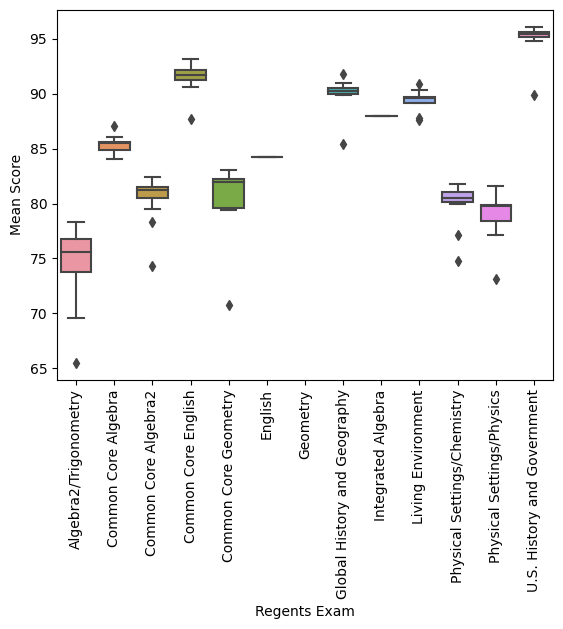

In [15]:
mean_scores = sns.boxplot(x='Regents Exam', y='Mean Score', data=bk16)

mean_scores.set_xticklabels(mean_scores.get_xticklabels(), rotation=90)

## Honestly, this is very interesting. The highest mean scores are for non-technical subjects like English and US History.

In [16]:
hs = df.loc[df['School Level'] == 'High school']
studentct_hs = hs.groupby(by="School Name")["Total Tested"].sum()
# First, I want to see how many students were tested at each school, I may want to choose a school with higher student count to
# expand my sample size.

studentct_hs = studentct_hs.sort_values(ascending = False)
print(studentct_hs)

for school, ct in studentct_hs.items():
    print (f"{school}: {ct}")

comparison = studentct_hs.nlargest(10, 'studentct_hs')
print(comparison)

School Name
Brooklyn Technical High School                        178560
Francis Lewis High School                             149295
Bayside High School                                   146150
Fort Hamilton High School                             145565
Midwood High School                                   133360
                                                       ...  
South Bronx Community Charter School                     535
Gateway School for Environmental Research and Tech       530
Washington Irving High School                            445
Legacy School for Integrated Studies                     180
International Arts Business School                        85
Name: Total Tested, Length: 457, dtype: int64
Brooklyn Technical High School: 178560
Francis Lewis High School: 149295
Bayside High School: 146150
Fort Hamilton High School: 145565
Midwood High School: 133360
Tottenville High School: 128095
Forest Hills High School: 126590
John Bowne High School: 121025
Hillcrest Hi

ValueError: keep must be either "first", "last" or "all"

In [17]:
comparison = studentct_hs.nlargest(10, keep = 'first')
print(comparison)

School Name
Brooklyn Technical High School     178560
Francis Lewis High School          149295
Bayside High School                146150
Fort Hamilton High School          145565
Midwood High School                133360
Tottenville High School            128095
Forest Hills High School           126590
John Bowne High School             121025
Hillcrest High School              119655
Benjamin N. Cardozo High School    114490
Name: Total Tested, dtype: int64


In [18]:
## Now let's compare how the 10 largest schools did on the Physics test in 2016!

comparison = ['Brooklyn Technical High School','rancis Lewis High School','Bayside High School','Fort Hamilton High School','Midwood High School','Tottenville High School', 'Forest Hills High School', 'John Bowne High School', 'Hillcrest High School', 'Benjamin N. Cardozo High School']
compare_physics = df[df['School Name'].isin(comparison)]

compare_physics_filtered = compare_physics.loc[compare_physics['Regents Exam'] =='Physical Settings/Physics']

In [19]:
compare_physics_filtered['Mean Score'] = pd.to_numeric(compare_physics_filtered['Mean Score'], errors='coerce')

C:\Users\shoover\AppData\Local\Temp\ipykernel_18520\365986455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_physics_filtered['Mean Score'] = pd.to_numeric(compare_physics_filtered['Mean Score'], errors='coerce')


[Text(0, 0, 'Brooklyn Technical High School'),
 Text(1, 0, 'Fort Hamilton High School'),
 Text(2, 0, 'Midwood High School'),
 Text(3, 0, 'John Bowne High School'),
 Text(4, 0, 'Benjamin N. Cardozo High School'),
 Text(5, 0, 'Bayside High School'),
 Text(6, 0, 'Forest Hills High School'),
 Text(7, 0, 'Hillcrest High School'),
 Text(8, 0, 'Tottenville High School')]

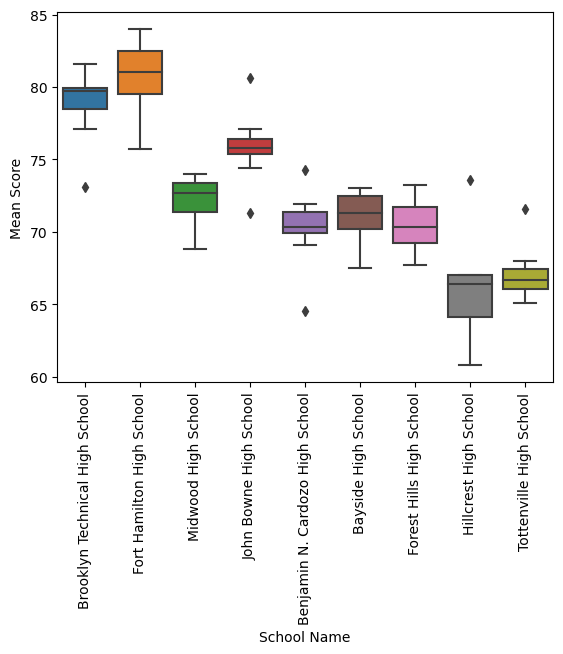

In [20]:
yr16 = compare_physics_filtered.loc[compare_physics_filtered['Year'] == 2016]
school_comparison16 = sns.boxplot(x='School Name', y='Mean Score', data=yr16)
school_comparison16.set_xticklabels(school_comparison16.get_xticklabels(), rotation=90)

[Text(0, 0, 'Brooklyn Technical High School'),
 Text(1, 0, 'Fort Hamilton High School'),
 Text(2, 0, 'Midwood High School'),
 Text(3, 0, 'John Bowne High School'),
 Text(4, 0, 'Benjamin N. Cardozo High School'),
 Text(5, 0, 'Bayside High School'),
 Text(6, 0, 'Forest Hills High School'),
 Text(7, 0, 'Hillcrest High School'),
 Text(8, 0, 'Tottenville High School')]

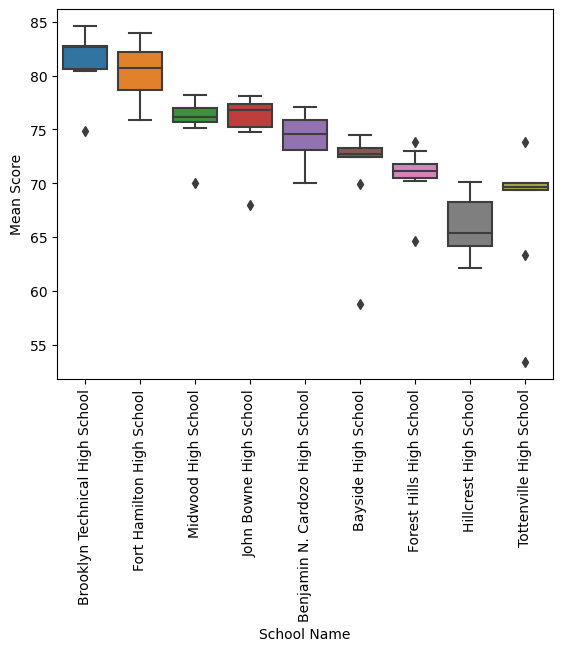

In [21]:
yr17 = compare_physics_filtered.loc[compare_physics_filtered['Year'] == 2017]
school_comparison17 = sns.boxplot(x='School Name', y='Mean Score', data=yr17)
school_comparison17.set_xticklabels(school_comparison16.get_xticklabels(), rotation=90)

In [22]:
## In this mini project, I evaluated Brooklyn Tech's students on the Physics exams' results. There were the most students tested
## across 2015,2016, and 2017 on the Physics test. I compared Brooklyn Tech to the next 9 biggest high schools, on their 
## performance on Physics tests in 2016 and 2017. It is really interesting to see that while Brooklyn Tech appears to do worse 
## in 2016 compared to the next biggest school, Fort Hamilton, the mean test score improved a lot to the next year, esp.
## compared to the rest of the big high schools. It makes senses to be known as a technical school with strong science and math
## expertise.